# Project 3 -Regression and Classification with the Ames Housing Data

## Part 3b
* Taking a different approach to identifying predictors
* Use logit regression
* Re-run KNN

---
## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [100]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

pd.set_option('display.max_columns',None)

sns.set_style('white')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# h2 : updated house data
house = pd.read_csv('h2.csv')

del house['Unnamed: 0']
house.columns

Index([u'id', u'mssubclass', u'mszoning', u'lotfrontage', u'lotarea',
       u'street', u'lotshape', u'landcontour', u'utilities', u'lotconfig',
       u'landslope', u'neighborhood', u'condition1', u'condition2',
       u'bldgtype', u'housestyle', u'overallqual', u'overallcond',
       u'yearbuilt', u'yearremodadd', u'roofstyle', u'roofmatl',
       u'exterior1st', u'exterior2nd', u'exterqual', u'extercond',
       u'foundation', u'bsmtqual', u'bsmtcond', u'bsmtexposure',
       u'bsmtfintype1', u'bsmtfinsf1', u'bsmtfintype2', u'bsmtfinsf2',
       u'bsmtunfsf', u'totalbsmtsf', u'heating', u'heatingqc', u'centralair',
       u'electrical', u'1stflrsf', u'2ndflrsf', u'lowqualfinsf', u'grlivarea',
       u'bsmtfullbath', u'bsmthalfbath', u'fullbath', u'halfbath',
       u'bedroomabvgr', u'kitchenabvgr', u'kitchenqual', u'totrmsabvgrd',
       u'functional', u'fireplaces', u'fireplacequ', u'garagetype',
       u'garagefinish', u'garagecars', u'garagearea', u'garagequal',
       u'garageco

In [101]:
# encode the target class variable 'salecondition to be a binary 1 if Abnorml, 0 if not Abnorml
house['salecondition'] = house['salecondition'].map(lambda x: 1 if (x == 'Abnorml') else 0)
house['salecondition'].value_counts()

0    1354
1      96
Name: salecondition, dtype: int64

In [102]:
# Using groupby 'salecondition' to find meaningful differences that can indicate predictors
house.groupby('salecondition').mean()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,age,remod_age
salecondition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,730.500000,56.783604,70.177844,10595.706056,6.144756,5.591581,1972.340473,1985.725258,447.132939,44.587888,570.551699,1062.272526,1166.609306,350.365583,4.920236,1521.895126,0.429838,0.054653,1.580502,0.391433,2.870015,1.045052,6.540620,0.629985,1.789513,478.116691,96.303545,46.926883,20.446824,3.384047,14.666913,2.186854,45.686854,6.304284,2007.827179,183845.542097,45.659527,32.274742
1,743.552083,58.593750,68.290617,9510.104167,5.687500,5.447917,1961.052083,1975.520833,417.375000,79.062500,522.583333,1019.020833,1138.875000,305.489583,14.145833,1458.510417,0.395833,0.093750,1.406250,0.291667,2.875000,1.062500,6.260417,0.427083,1.500000,405.031250,74.000000,41.052083,36.906250,4.125000,21.156250,11.114583,10.625000,6.427083,2007.604167,150758.354167,56.947917,42.479167



### Observations for Abnorml

In project3_4, the hypothesis was that age, remod_age, mssubclass, mszoning, lotarea, neighborhood, housestyle determine
abnormal sales. Using KNN, it did not appear to be so.

Taking a different approach above to shortlist predictors for salecondition 1 = Abnorml, vs 0 = Not Abnorml, based on 
the groupby above

* **lotarea** is smaller
* **overallqual, overallcond** is lower
* **yearbuilt,yearremodadd** is older -> **age, remod_age** is higher
* **lowqualfinsf** is higher
* **poolarea** is higher
* **saleprice** is lower


In [103]:
# based on the above, choose a new subset of house that may have a potential impact on salecondition

col =['lotarea','overallqual','overallcond','age','remod_age','lowqualfinsf','poolarea',
      'saleprice','salecondition']
h2 = house[col]
h2.head(4)

,lotarea,overallqual,overallcond,age,remod_age,lowqualfinsf,poolarea,saleprice,salecondition
0,8450,7,5,15,15,0,0,208500,0
1,9600,6,8,42,42,0,0,181500,0
2,11250,7,5,17,16,0,0,223500,0
3,9550,7,5,103,48,0,0,140000,1


Text(0.5,1,u'Sale Condition Features')

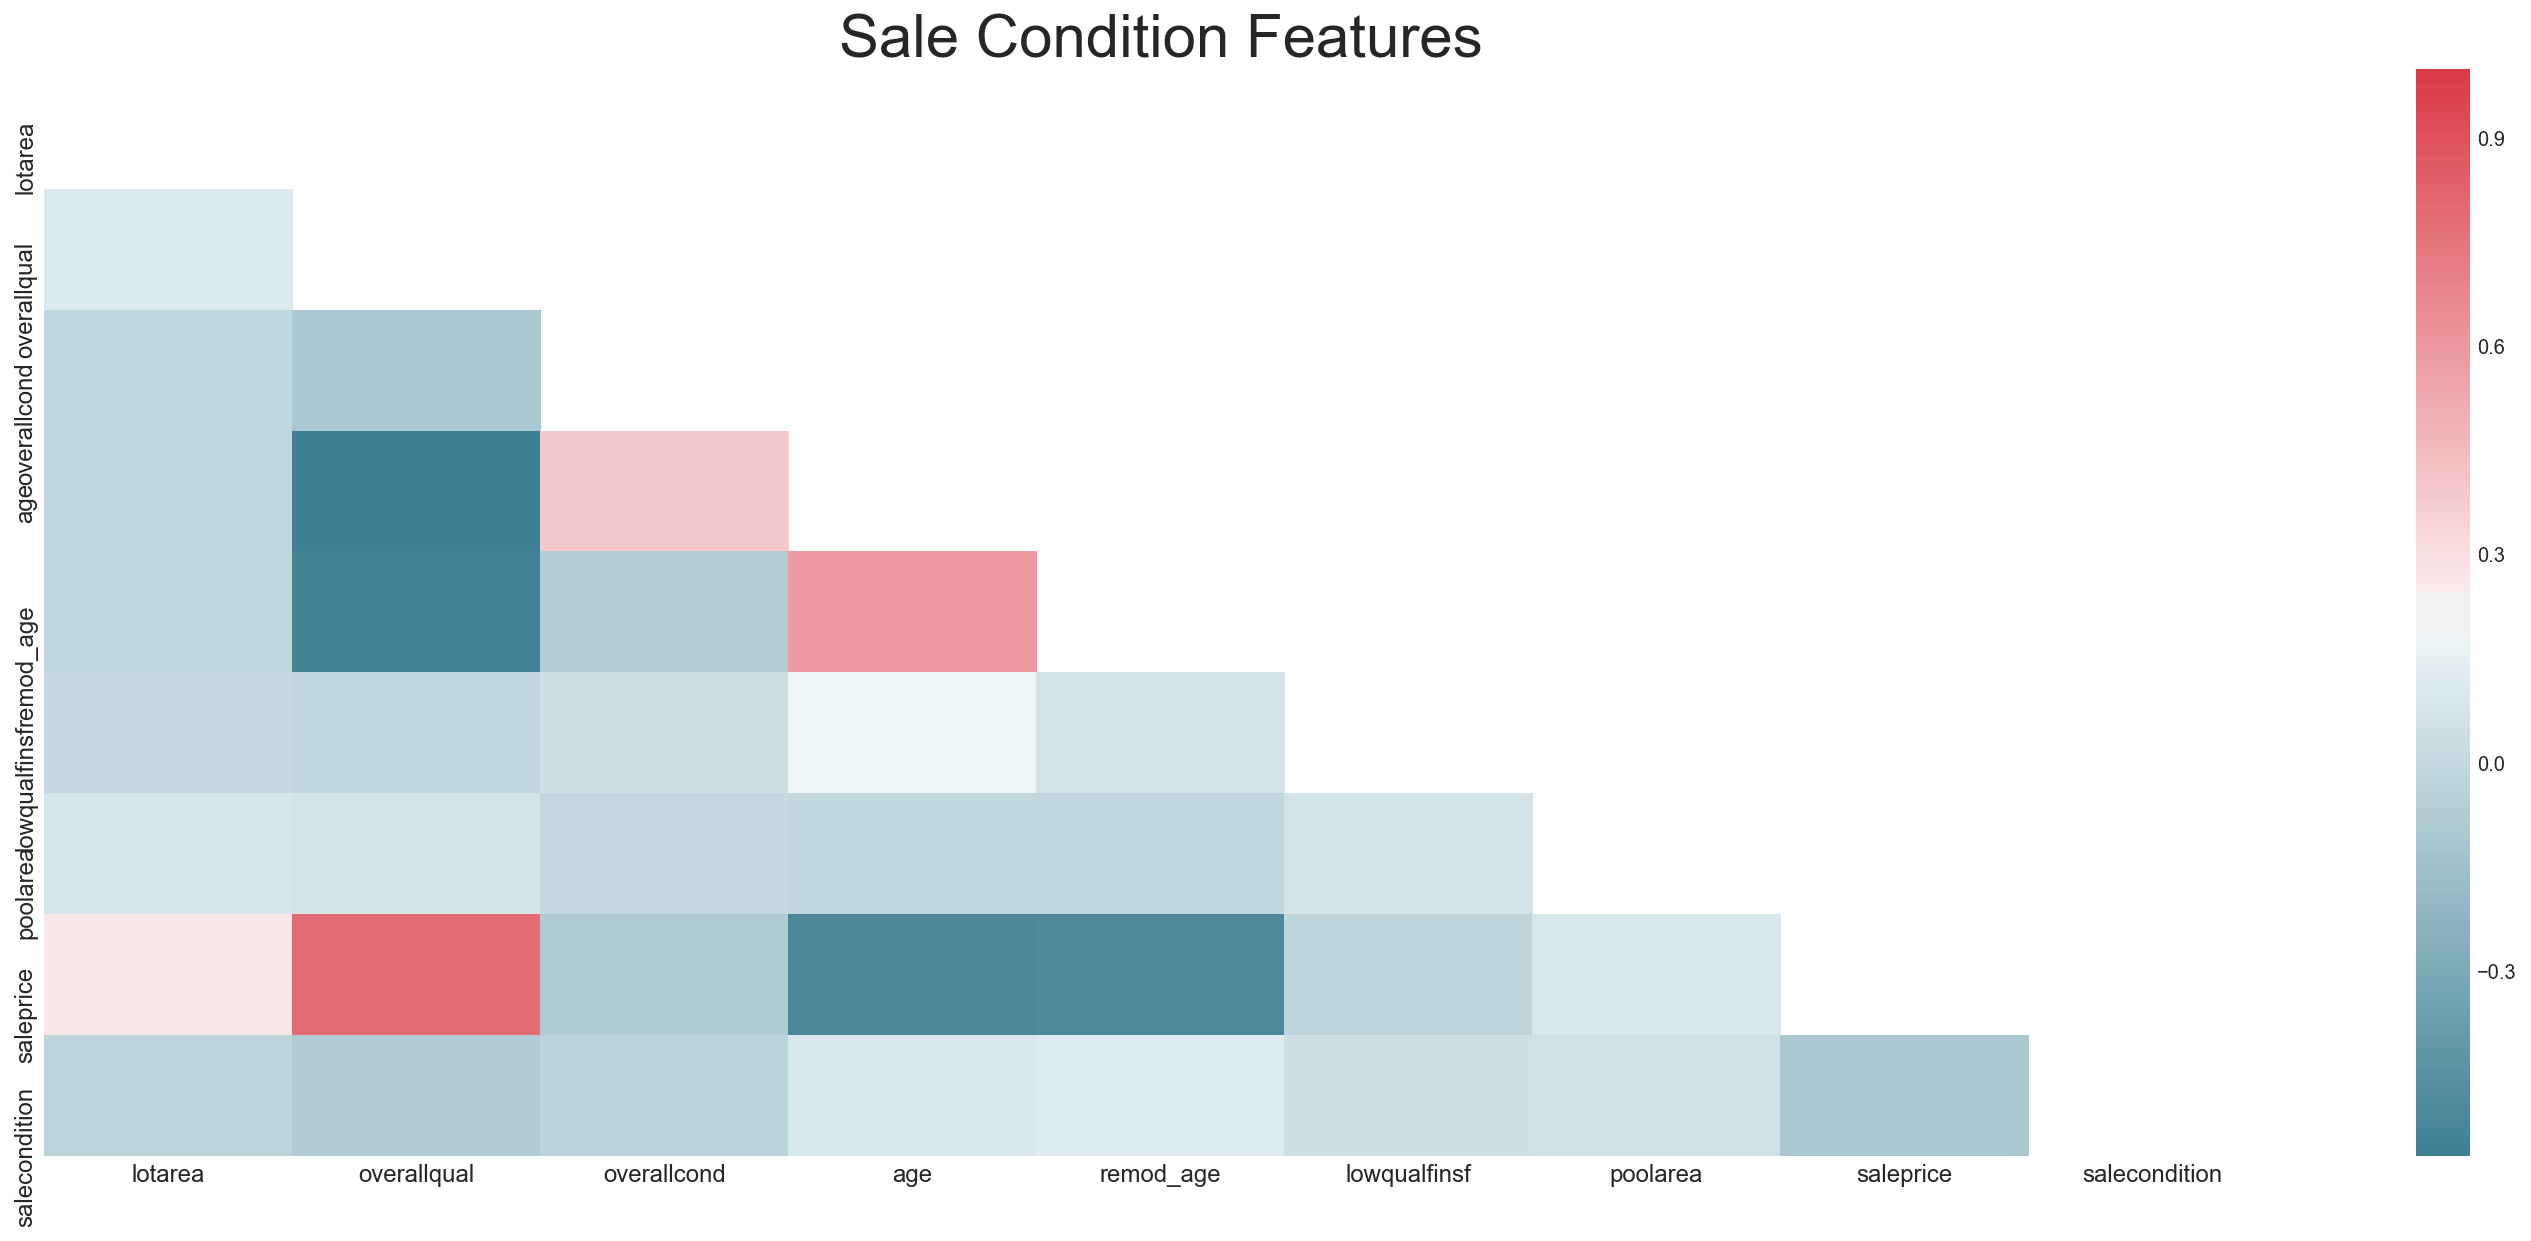

In [104]:
# examine correlation structure of the dataset

fig,ax=plt.subplots(figsize=(25,10))
cmap=sns.diverging_palette(220,10, as_cmap=True)

h2_corr=h2.corr()
mask=np.zeros_like(h2_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plot_a = sns.heatmap(h2_corr, mask = mask, ax=ax, cmap=cmap)
plot_a.tick_params(labelsize = 12)
plot_a.set_title('Sale Condition Features', fontsize=30)

In [105]:
h2['salecondition'].value_counts()
# Inbalanced classes

0    1354
1      96
Name: salecondition, dtype: int64

## Upsample minority class to balance

In [106]:
# up-sample minority class method to balance; resample with replacement
from sklearn.utils import resample

# seperate majority and minority classes
h2_majority = h2[h2.salecondition == 0]
h2_minority = h2[h2.salecondition == 1]

# upsample minorithy class
h2_minority_upsampled = resample(h2_minority, replace = True, n_samples = 1354, random_state=0)

# combine majority class with upsampled minority class
h2_upsampled = pd.concat([h2_majority, h2_minority_upsampled])

# check new class counts
h2_upsampled['salecondition'].value_counts()

1    1354
0    1354
Name: salecondition, dtype: int64

In [107]:
y = h2_upsampled['salecondition']
h3 = h2_upsampled.drop('salecondition',axis =1)
X = h3

## Use Logit regression

In [108]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
model = logit_model.fit()
print (model.summary())

Optimization terminated successfully.
         Current function value: 0.648121
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          salecondition   No. Observations:                 2708
Model:                          Logit   Df Residuals:                     2700
Method:                           MLE   Df Model:                            7
Date:                Tue, 03 Apr 2018   Pseudo R-squ.:                 0.06496
Time:                        19:25:59   Log-Likelihood:                -1755.1
converged:                       True   LL-Null:                       -1877.0
                                        LLR p-value:                 5.604e-49
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
lotarea      -1.331e-05   7.93e-06     -1.679      0.093   -2.88e-05    2.23e-06
overallqual      0.1615


### Observations for logit Regression Results
If p value < 0.05, consider significant
* Based on the z and corresponding P values, **overallqual, overallcond, remod_age, poolarea** are 
significant to the model.
* Drop **lotarea, age, lowqualfinsf**


In [109]:
# y = h2['salecondition']
h4 = h3.drop(['lotarea', 'age', 'lowqualfinsf'],axis =1)
X_r = h4


In [110]:
# standardise the predictor matrix

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X_r)

In [111]:
# Train_test_split

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
# Checking accuracy of model

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.627


In [113]:
# Cross Validation 
# http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

from sklearn import model_selection 
from sklearn.model_selection import cross_val_score

# choice of stratified as the number of Abnorml sale condition is small
Skfold = model_selection.StratifiedKFold(n_splits=10, random_state=7)
model_cv = LogisticRegression()
results = model_selection.cross_val_score(model_cv, X_train, y_train, cv=Skfold)
print results
print 'average accuracy: {:.3f}'.format(results.mean())


[ 0.58115183  0.60209424  0.62105263  0.56084656  0.62962963  0.60846561
  0.65608466  0.6031746   0.65608466  0.61904762]
average accuracy: 0.614


In [114]:
# confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test, y_pred)

confusion = pd.DataFrame(con,index=['is not Abnorml','is Abnorml'], columns =['predicted not Abnorml', 'predicted  Abnorml'])
confusion


,predicted not Abnorml,predicted Abnorml
is not Abnorml,263,149
is Abnorml,154,247


In [115]:
# confusion matrix indicates (TN = 263 + FP = 149) correct, (FN = 154 + TP = 247) incorrect predictions


In [116]:
from sklearn.metrics import classification_report
# precision - precent that model was correct when it was predicting true
# recall - precent that the model correctly predicted 1 when label was 1
# f1 score best = 1 worst = 0

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.63      0.64      0.63       412
          1       0.62      0.62      0.62       401

avg / total       0.63      0.63      0.63       813



0.627154807157


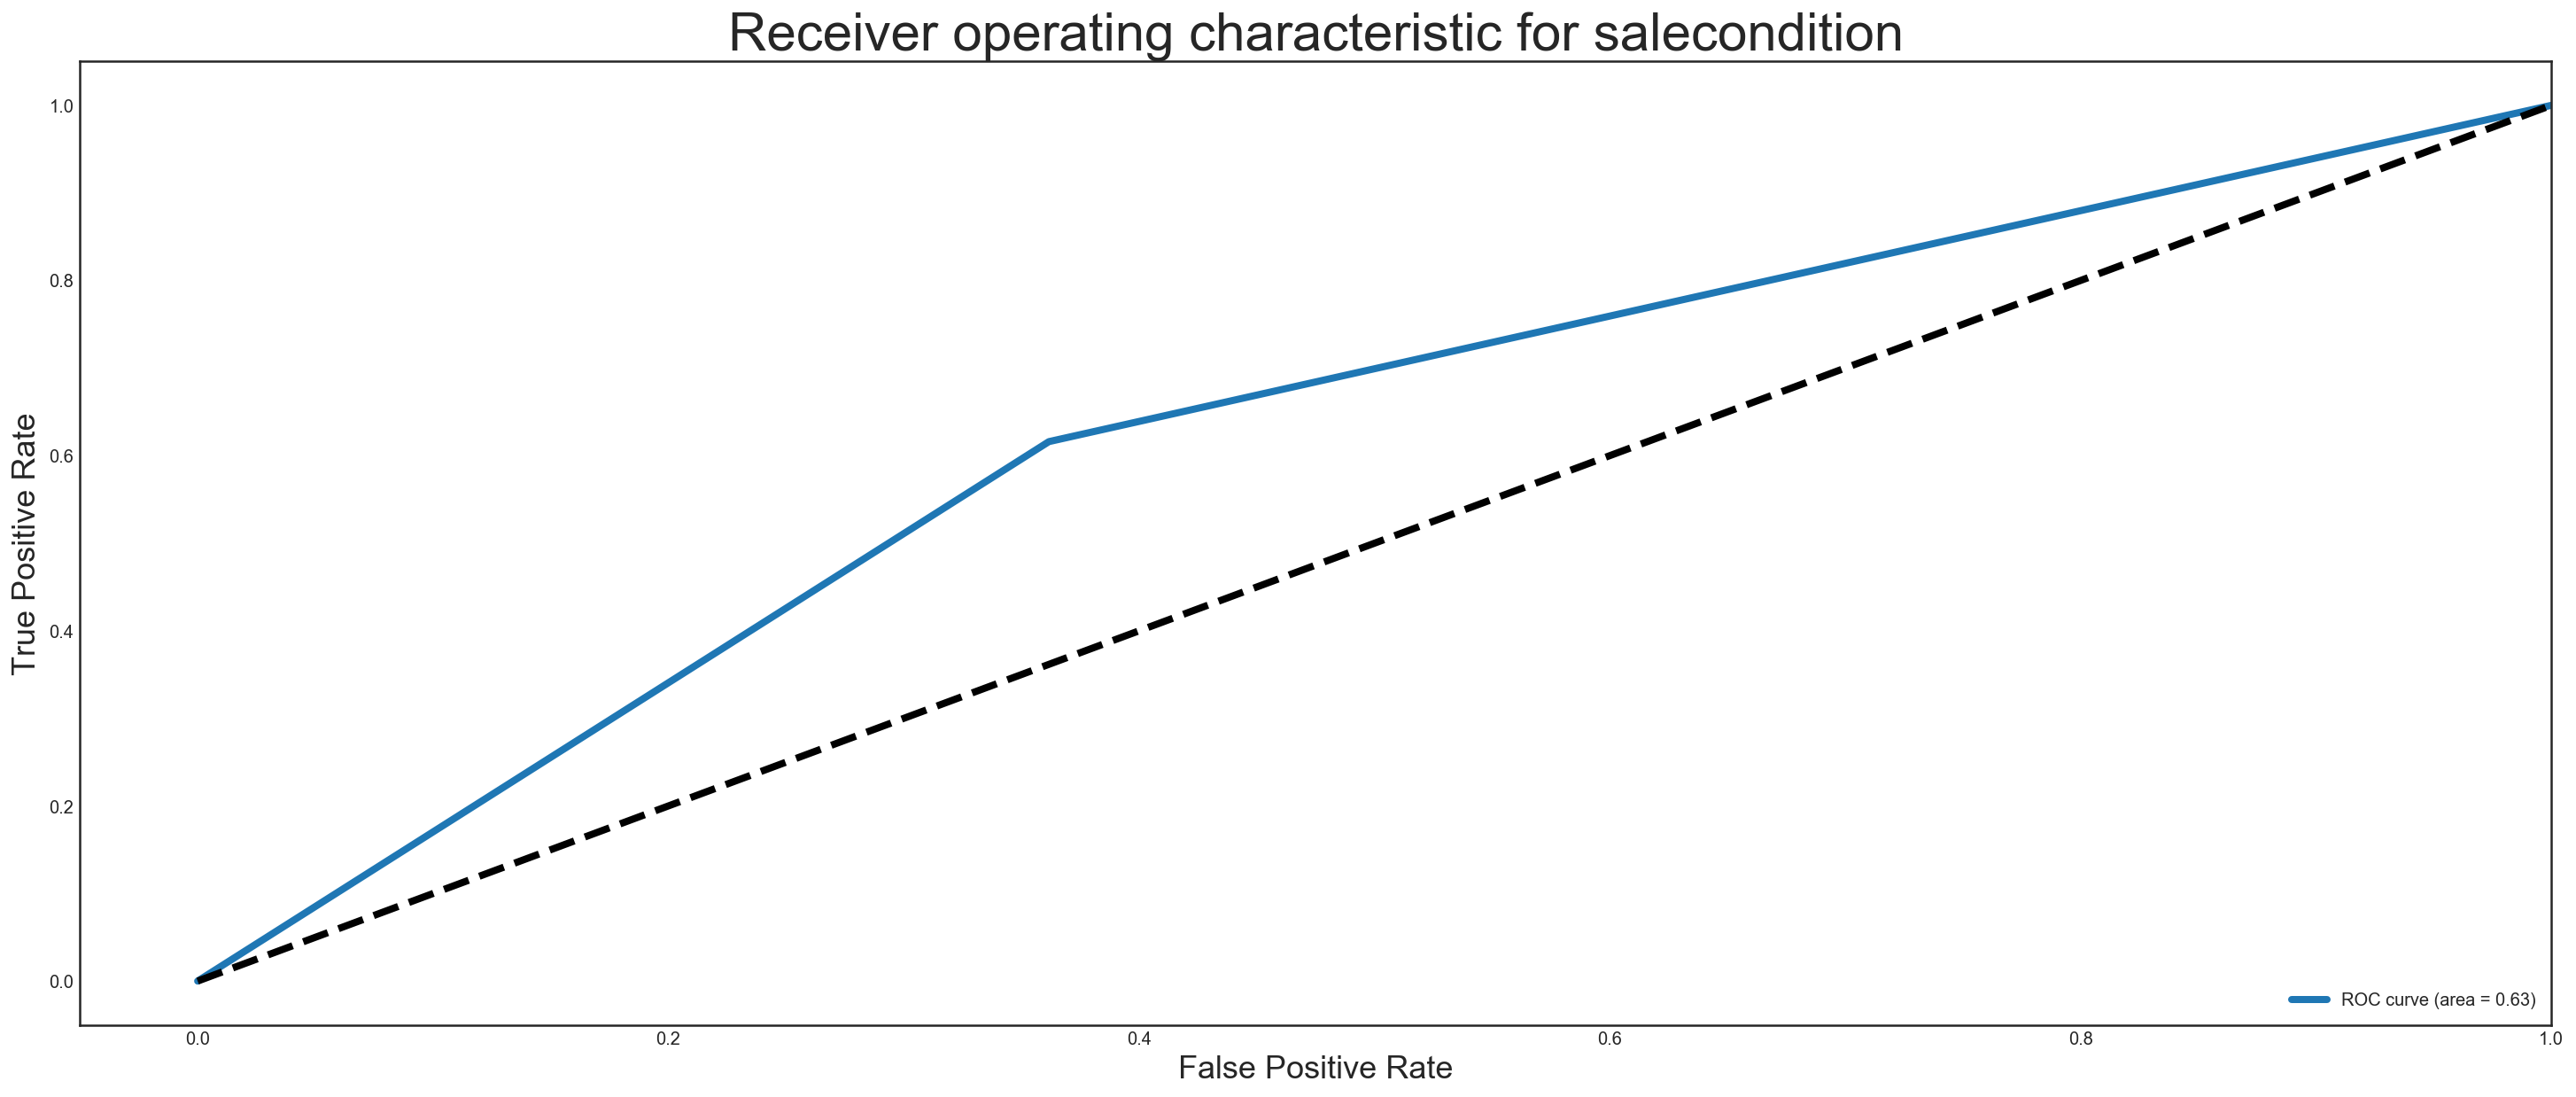

In [117]:
from sklearn.metrics import roc_curve, auc

# For class 1, find the area under the curve.
fpr, tpr, _ = roc_curve(y_test, logreg.predict(X_test))
roc_auc = auc(fpr, tpr)
print roc_auc

# Plot of a ROC curve for class 1 (Abnorml)
plt.figure(figsize=[25,10])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for salecondition', fontsize=30)
plt.legend(loc="lower right")
plt.show()

## Run the new feature set with KNN

In [118]:
# Run the new set with KNN 

## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=5)

## Fit the model on the training data.
knn.fit(X_train, y_train)

## See how the model performs on the test data.
print 'knn score:', knn.score(X_test, y_test),'\n'

Skfold = model_selection.StratifiedKFold(n_splits=10, random_state=7)
model_cv = KNeighborsClassifier(n_neighbors=5)
results = model_selection.cross_val_score(model_cv, X_train, y_train, cv=Skfold)
print results
print 'average accuracy: {:.3f}'.format(results.mean())


knn score: 0.892988929889 

[ 0.90052356  0.86387435  0.85263158  0.81481481  0.85185185  0.87301587
  0.8994709   0.87301587  0.86243386  0.87830688]
average accuracy: 0.867


In [119]:
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=2)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
print 'knn score:', knn.score(X_test, y_test),'\n'

Skfold = model_selection.StratifiedKFold(n_splits=10, random_state=7)
model_cv = KNeighborsClassifier(n_neighbors=2)
results = model_selection.cross_val_score(model_cv, X_train, y_train, cv=Skfold)
print results
print 'average accuracy: {:.3f}'.format(results.mean())

knn score: 0.960639606396 

[ 0.97382199  0.92146597  0.96315789  0.95238095  0.94179894  0.94708995
  0.96825397  0.95767196  0.93650794  0.94179894]
average accuracy: 0.950


In [121]:
## Instantiate the model with 10 neighbors. 
knn = KNeighborsClassifier(n_neighbors=10)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
print 'knn score:', knn.score(X_test, y_test),'\n'

Skfold = model_selection.StratifiedKFold(n_splits=10, random_state=7)
model_cv = KNeighborsClassifier(n_neighbors=10)
results = model_selection.cross_val_score(model_cv, X_train, y_train, cv=Skfold)
print results
print 'average accuracy: {:.3f}'.format(results.mean())

knn score: 0.79827798278 

[ 0.82722513  0.7591623   0.74736842  0.75132275  0.78306878  0.76190476
  0.79365079  0.78306878  0.75661376  0.74603175]
average accuracy: 0.771


In [ ]:
## Revisiting the feature selection with RFE

The purpose of doing this is to understand if a data driven approach is better than the original hypothesis

In [122]:
# Revisiting the feature selection with RFE
house.head()
house.head(4)
house.mszoning.value_counts()

RL    1151
RM     218
FV      65
RH      16
Name: mszoning, dtype: int64

In [123]:
# create a df for the non numeric features
obj_df = house.select_dtypes(include=['object']).copy()

col = list(obj_df.columns)

#print list(col)
dummy =pd.get_dummies(obj_df, columns =col, prefix =col, drop_first=True)
dummy.head(4)


,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_No,bsmtqual_TA,bsmtcond_Gd,bsmtcond_No,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_No,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_No,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_No,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No,garagefinish_No,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_No,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_No,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,poolqc_Fa,poolqc_Gd,poolqc_No,fence_GdWo,fence_MnPrv,fence_MnWw,fence_No,miscfeature_No,miscfeature_Othr,miscfeature_Shed,miscfeature_TenC,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [124]:
house = pd.concat([house,dummy],axis=1)
house.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,age,remod_age,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_No,bsmtqual_TA,bsmtcond_Gd,bsmtcond_No,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_No,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_No,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,fireplacequ_Fa,fireplacequ_Gd,fireplacequ_No,fireplacequ_Po,fireplacequ_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagetype_No,garagefinish_No,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_No,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_No,garagecond_Po,garagecond_TA,paveddrive_

In [125]:
house.drop(col,axis=1, inplace=True)
house.drop('id',axis=1, inplace=True)

In [138]:
col2 =house.columns.values.tolist()
y = ['salecondition']
X = [i for i in col2 if i not in y]

In [158]:
from sklearn.feature_selection import RFE

logreg2 = LogisticRegression()
rfe = RFE(logreg,100)
rfe = rfe.fit(house[X],house[y])

play = sorted(zip(rfe.ranking_,X))
print play

[(1, 'bldgtype_Duplex'), (1, 'bldgtype_Twnhs'), (1, 'bsmtcond_Gd'), (1, 'bsmtcond_Po'), (1, 'bsmtexposure_Gd'), (1, 'bsmtexposure_Mn'), (1, 'bsmtfintype1_BLQ'), (1, 'bsmtfintype1_LwQ'), (1, 'bsmtfintype2_BLQ'), (1, 'bsmtfintype2_LwQ'), (1, 'bsmthalfbath'), (1, 'bsmtqual_Fa'), (1, 'bsmtqual_TA'), (1, 'centralair_Y'), (1, 'condition1_Feedr'), (1, 'condition1_PosN'), (1, 'condition1_RRAe'), (1, 'electrical_Mix'), (1, 'electrical_SBrkr'), (1, 'extercond_Fa'), (1, 'extercond_Gd'), (1, 'extercond_TA'), (1, 'exterior1st_BrkComm'), (1, 'exterior1st_CemntBd'), (1, 'exterior1st_Stone'), (1, 'exterior1st_Stucco'), (1, 'exterior1st_VinylSd'), (1, 'exterior2nd_BrkFace'), (1, 'exterior2nd_HdBoard'), (1, 'exterior2nd_ImStucc'), (1, 'exterior2nd_Stone'), (1, 'exterior2nd_Wd Sdng'), (1, 'exterior2nd_Wd Shng'), (1, 'fence_GdWo'), (1, 'fence_MnPrv'), (1, 'fence_No'), (1, 'fireplacequ_Fa'), (1, 'fireplacequ_Gd'), (1, 'fireplacequ_Po'), (1, 'fireplaces'), (1, 'foundation_Slab'), (1, 'fullbath'), (1, 'funct

100